In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib
import datetime

matplotlib.rcParams['font.family']='Malgun Gothic'
pd.set_option('display.max_rows',300)

In [2]:
df = pd.read_excel('data/삼성카드/데이터_삼성카드.xlsx')

# 전처리 & 데이터 이해

In [3]:
# 컬럼명 변경
df.columns = ['기준년월','법정동코드','법정동명','업종코드','업종명','cnt',\
              '20m','30m','40m','50m','60m','20f','30f','40f','50f','60f',\
              '월','화','수','목','금','토','일','평일','휴일','a','b','c','d','e','f','g','h','i','j']

# 중복정보인 법정동 코드와 업종코드 열 삭제
df.drop(['법정동코드','업종코드'],axis=1)

# 불확실하고 활용도가 불명확한 결제시간 열 삭제
df = df.iloc[:,:-10]

# 기준년월 date_time형태로 변경
pd.to_datetime( df.기준년월, format='%Y%m' );

### 군산/ 목포/ 통영 분리.     도&시 명칭 제거

In [4]:
gs = df[df.법정동명.str.contains('군산')]
mp = df[df.법정동명.str.contains('목포')]
ty = df[df.법정동명.str.contains('통영')]

In [5]:
gs.법정동명 = gs.법정동명.str.replace('전북 군산시 ','')
mp.법정동명 = mp.법정동명.str.replace('전남 목포시 ','')
ty.법정동명 = ty.법정동명.str.replace('경남 통영시 ','')
# 마지막 space한칸!!!

F:\anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### 데이터 분포확인

In [6]:
df.기준년월.value_counts();

In [7]:
df.업종명.value_counts();

In [8]:
df.법정동명.value_counts();

In [9]:
gs.pivot_table(index='법정동명', values='cnt', aggfunc='sum').rename_axis(index=None).describe()

,cnt
count,100.000000
mean,13019.060000
std,34471.324792
min,11.000000
25%,371.000000
50%,1641.000000
75%,7847.250000
max,217855.000000


## 소비성

### 업종별 결제횟수

<AxesSubplot:title={'center':'업종별 결제수'}>

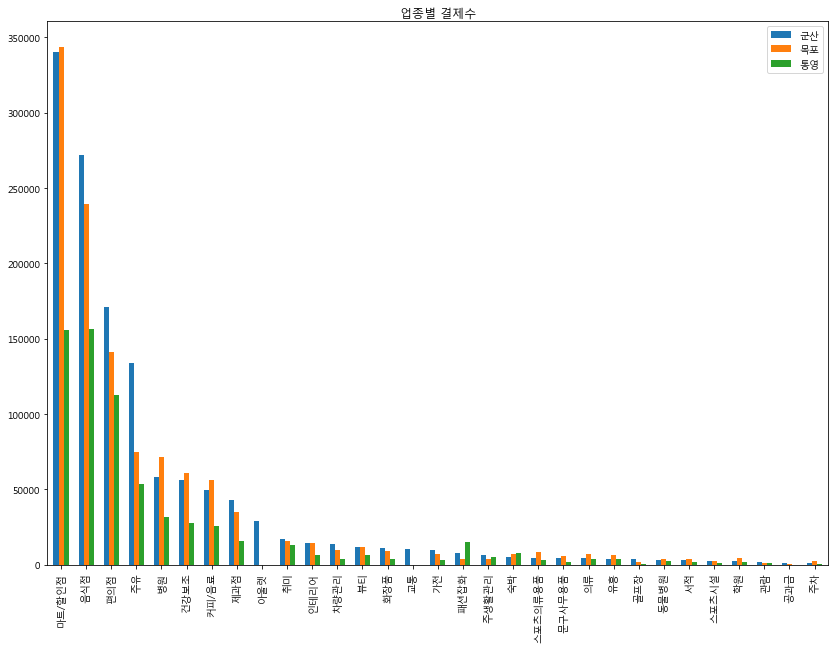

In [10]:
업종별결제수 =\
pd.concat([
    (gs.pivot_table(index='업종명',values='cnt',aggfunc='sum')).rename_axis(index=None).sort_values('cnt',ascending=False).rename(columns={'cnt':'군산'}),
    (mp.pivot_table(index='업종명',values='cnt',aggfunc='sum')).rename_axis(index=None).sort_values('cnt',ascending=False).rename(columns={'cnt':'목포'}),
    (ty.pivot_table(index='업종명',values='cnt',aggfunc='sum')).rename_axis(index=None).sort_values('cnt',ascending=False).rename(columns={'cnt':'통영'})
],axis=1).replace(np.NaN,0)
업종별결제수.iloc[:-11].plot(kind='bar', title='업종별 결제수',figsize=(14,10),logy=False, width=0.6)

### 업종별 결제횟수비율

<AxesSubplot:title={'center':'업종별 결제비중'}>

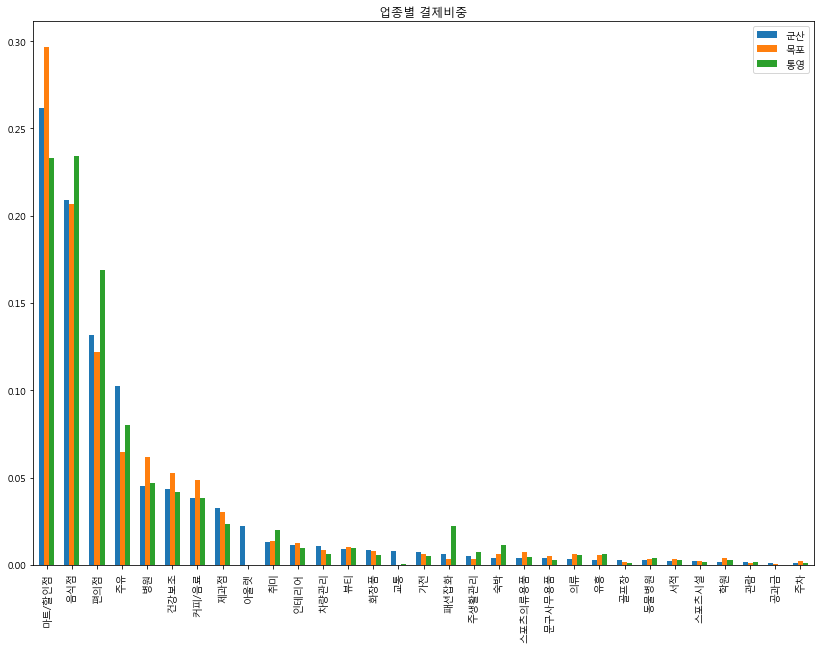

In [11]:
업종별결제비중 =\
pd.concat([
    (gs.pivot_table(index='업종명',values='cnt',aggfunc='sum')/gs.cnt.sum()).rename_axis(index=None).sort_values('cnt',ascending=False).rename(columns={'cnt':'군산'}),
    (mp.pivot_table(index='업종명',values='cnt',aggfunc='sum')/mp.cnt.sum()).rename_axis(index=None).sort_values('cnt',ascending=False).rename(columns={'cnt':'목포'}),
    (ty.pivot_table(index='업종명',values='cnt',aggfunc='sum')/ty.cnt.sum()).rename_axis(index=None).sort_values('cnt',ascending=False).rename(columns={'cnt':'통영'})
],axis=1).replace(np.NaN,0)
업종별결제비중.iloc[:-11].plot(kind='bar', title='업종별 결제비중',figsize=(14,10),logy=False, width=0.6)

### 공휴일 업종별 결제횟수

<AxesSubplot:title={'center':'휴일 업종별 결제수'}>

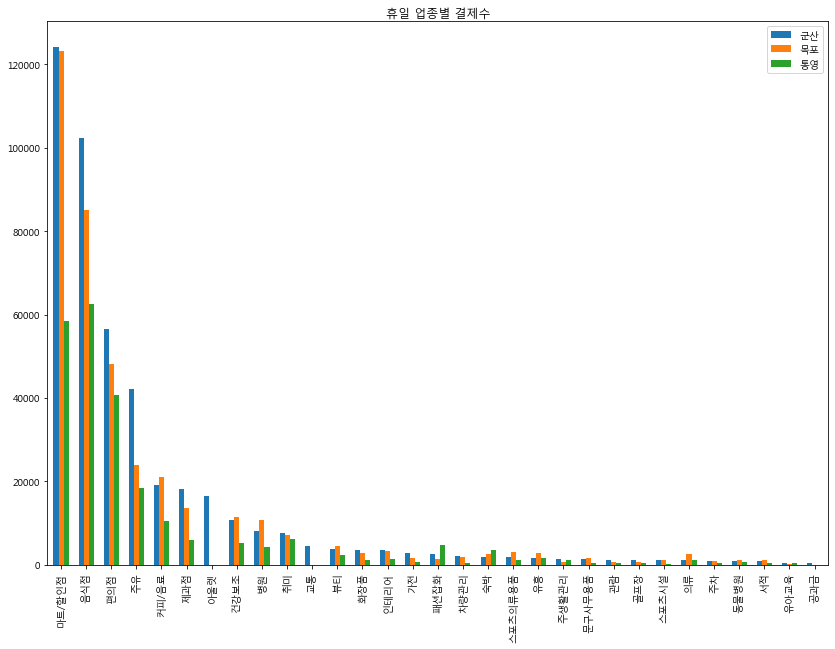

In [12]:
휴일업종별결제수 =\
pd.concat([
    (gs.pivot_table(index='업종명',values='휴일',aggfunc='sum')).rename_axis(index=None).sort_values('휴일',ascending=False).rename(columns={'휴일':'군산'}),
    (mp.pivot_table(index='업종명',values='휴일',aggfunc='sum')).rename_axis(index=None).sort_values('휴일',ascending=False).rename(columns={'휴일':'목포'}),
    (ty.pivot_table(index='업종명',values='휴일',aggfunc='sum')).rename_axis(index=None).sort_values('휴일',ascending=False).rename(columns={'휴일':'통영'})
],axis=1).replace(np.NaN,0)
휴일업종별결제수.iloc[:-11].plot(kind='bar', title='휴일 업종별 결제수',figsize=(14,10),logy=False, width=0.6)

### 공휴일 업종별 결제횟수비중

<AxesSubplot:title={'center':'휴일 업종별 결제비중'}>

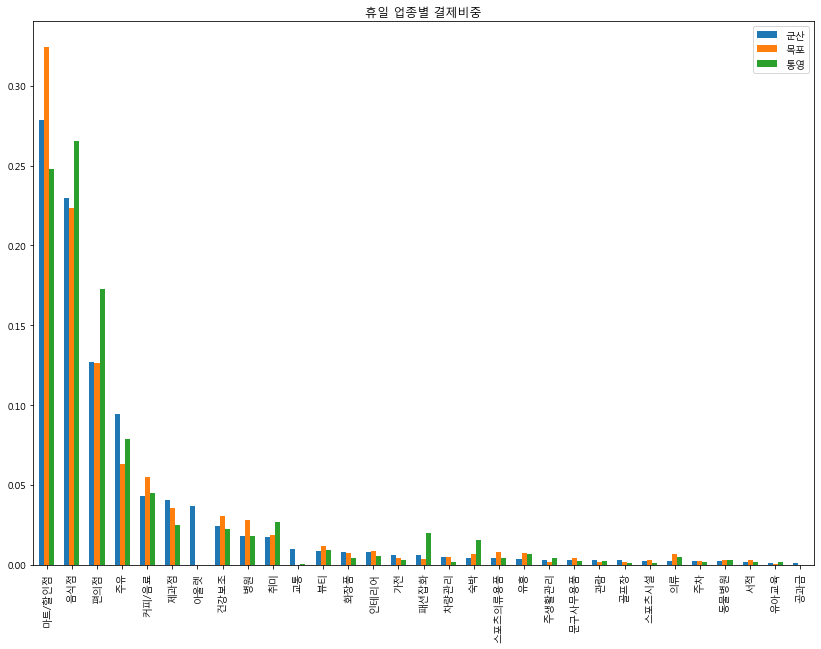

In [13]:
휴일업종별결제비중 =\
pd.concat([
    (gs.pivot_table(index='업종명',values='휴일',aggfunc='sum')/gs.휴일.sum()).rename_axis(index=None).sort_values('휴일',ascending=False).rename(columns={'휴일':'군산'}),
    (mp.pivot_table(index='업종명',values='휴일',aggfunc='sum')/mp.휴일.sum()).rename_axis(index=None).sort_values('휴일',ascending=False).rename(columns={'휴일':'목포'}),
    (ty.pivot_table(index='업종명',values='휴일',aggfunc='sum')/ty.휴일.sum()).rename_axis(index=None).sort_values('휴일',ascending=False).rename(columns={'휴일':'통영'})
],axis=1).replace(np.NaN,0)
휴일업종별결제비중.iloc[:-11].plot(kind='bar', title='휴일 업종별 결제비중',figsize=(14,10),logy=False, width=0.6)

### 군산 총결제 vs 고군산군도 결제횟수

In [14]:
고군산군도 = '대장도리 선유도리 무녀도리 신시도리 야미도리'.split(' ')
ggs = gs[gs.법정동명.isin(고군산군도)]

In [15]:
print('고군산군도에서 일어난 카드결제수는 전체의',round(100*ggs.cnt.sum()/gs.cnt.sum(),2),'%')
print('휴일기준 고군산군도에서 일어난 카드결제수는 전체의',round(100*ggs.휴일.sum()/gs.휴일.sum(),2),'%')

고군산군도에서 일어난 카드결제수는 전체의 0.42 %
휴일기준 고군산군도에서 일어난 카드결제수는 전체의 0.85 %


### 고군산군도 업종별 결제횟수

In [16]:
ggs.pivot_table(index='업종명',values='cnt',aggfunc='sum').rename_axis(index=None)\
.sort_values('cnt',ascending=False).rename(columns={'cnt':'고군산군도'})

,고군산군도
음식점,2253
마트/할인점,1200
커피/음료,1166
편의점,870
취미,35


<AxesSubplot:title={'center':'고군산군도 업종별 결제수'}>

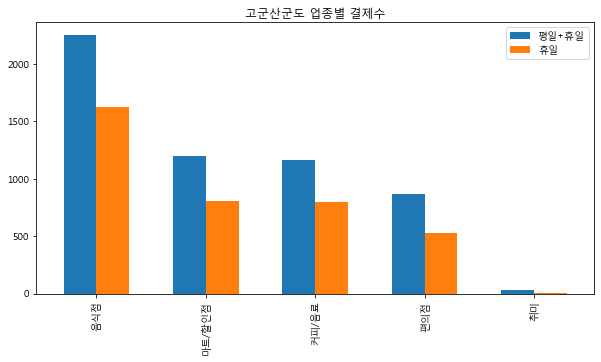

In [17]:
pd.concat([
ggs.pivot_table(index='업종명',values='cnt',aggfunc='sum').rename_axis(index=None)\
.sort_values('cnt',ascending=False).rename(columns={'cnt':'평일+휴일'}),\
ggs.pivot_table(index='업종명',values='휴일',aggfunc='sum').rename_axis(index=None)\
.sort_values('휴일',ascending=False).rename(columns={'휴일':'휴일'})
          ],axis=1)\
.plot(kind='bar', title='고군산군도 업종별 결제수',figsize=(10,5),logy=False, width=0.6)

### 군산/목포/통영의 카페소비비중 비교

<AxesSubplot:title={'center':'군산/목포/통영의 휴일 카페소비비중(%)'}>

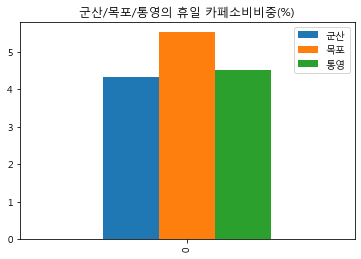

In [44]:
gs_r_c_hd = 100*gs[gs.업종명=='커피/음료'].휴일.sum()/gs.휴일.sum()
mp_r_c_hd = 100*mp[mp.업종명=='커피/음료'].휴일.sum()/mp.휴일.sum()
ty_r_c_hd = 100*ty[ty.업종명=='커피/음료'].휴일.sum()/ty.휴일.sum()
pd.DataFrame([gs_r_c_hd,mp_r_c_hd,ty_r_c_hd],index=['군산','목포','통영']).T.plot(kind='bar',title='군산/목포/통영의 휴일 카페소비비중(%)')

### 휴일 카페소비 동별 비중

<AxesSubplot:title={'center':'법정동별 휴일 카페소비'}, ylabel='법정동명'>

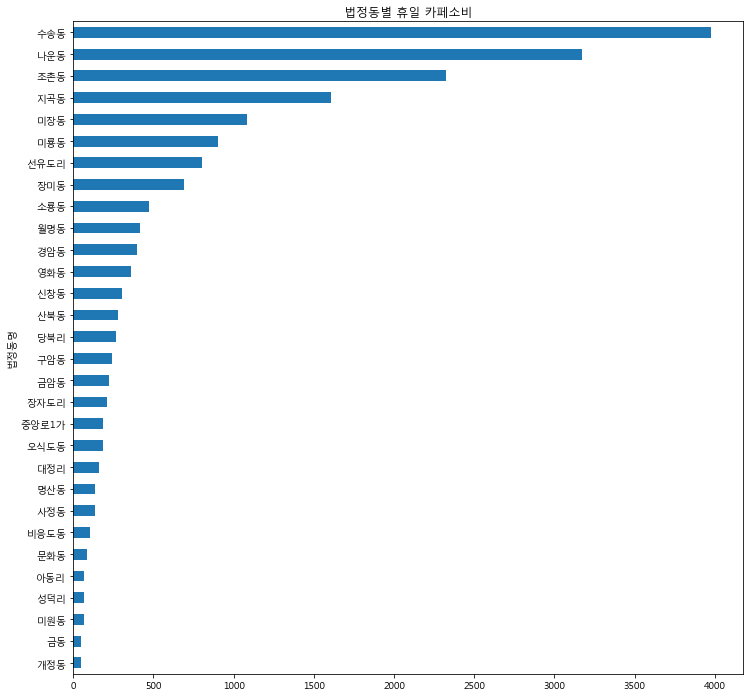

In [18]:
gs.pivot_table(index='법정동명',columns='업종명',values='휴일',aggfunc='sum')['커피/음료']\
.replace(np.NaN,0).sort_values()[-30:].plot(kind='barh',figsize=(12,12), title='법정동별 휴일 카페소비')

In [20]:
gs[gs.업종명=='커피/음료'].pivot_table(index='법정동명',values='cnt',aggfunc='sum').rename_axis(index=None)\
.sort_values('cnt',ascending=False).head(19).T

,수송동,나운동,조촌동,지곡동,미장동,미룡동,장미동,소룡동,선유도리,월명동,오식도동,경암동,산북동,신창동,영화동,당북리,금암동,구암동,대정리
cnt,11519,7796,6453,4068,3002,2514,1249,1247,1166,1021,934,880,835,672,660,648,517,500,418


In [21]:
gs.pivot_table(index='법정동명',values='cnt',aggfunc='sum').rename_axis(index=None)\
.sort_values('cnt',ascending=False).head(19).T

,수송동,나운동,조촌동,경암동,소룡동,미룡동,산북동,미장동,지곡동,오식도동,서포리,중앙로1가,경장동,구암동,당북리,문화동,산곡리,내초동,장미동
cnt,217855,206510,129762,77538,69071,62593,53338,49217,44481,33187,28679,25580,23964,18403,18126,15867,14381,13976,12112
